<a href="https://colab.research.google.com/github/aditi17goel/ActivityRecognition/blob/main/KL_Divergence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import networkx as nx
import pandas as pd
import csv
import glob

In [4]:
path = '/content/drive/MyDrive/coauthor' 
all_files = glob.glob(path + "/20*.txt")

df = []

for filename in all_files:
    temp = pd.read_csv(filename, delimiter="\t", header = None, on_bad_lines='skip')
    df.append(temp)

In [5]:
df[0].head()


,0,1
0,1310720,110487
1,1310720,630593
2,1,1390071
3,1048579,872473
4,1048579,1376772


In [6]:
G =[]

for i in range(len(df)):
  graph = nx.Graph()
  for index, row in df[i].iterrows():
    graph.add_edge(row[0], row[1])
  G.append(graph)

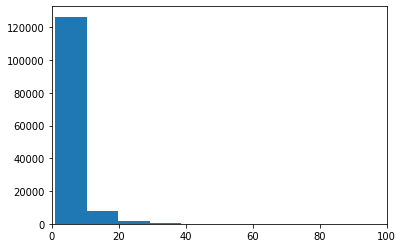

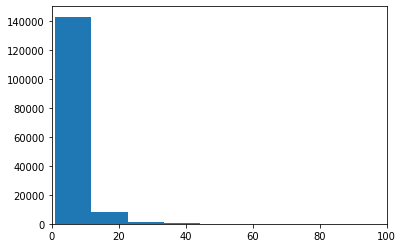

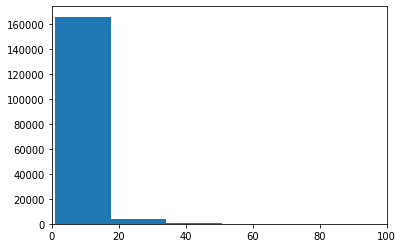

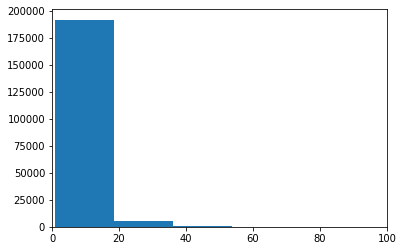

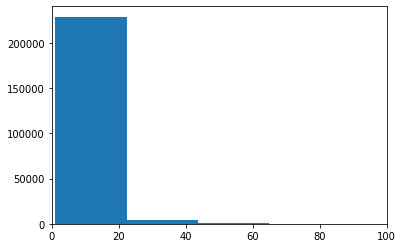

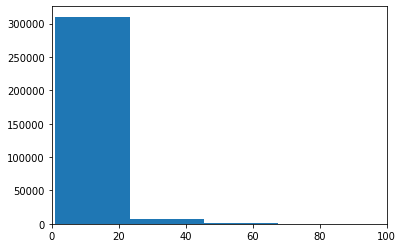

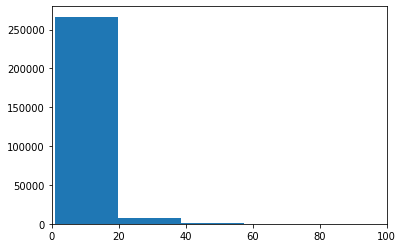

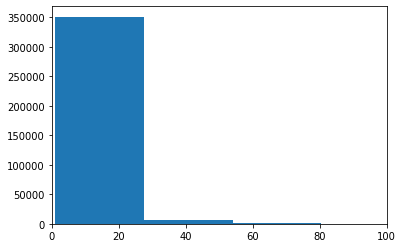

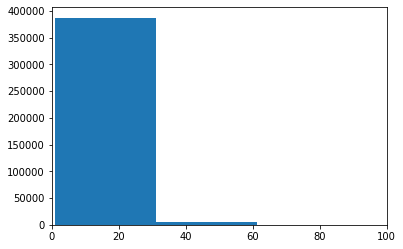

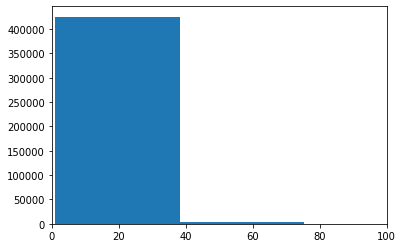

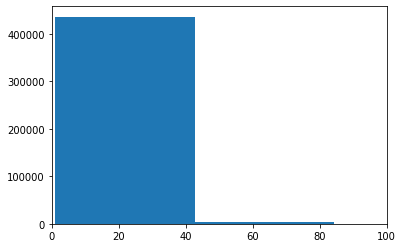

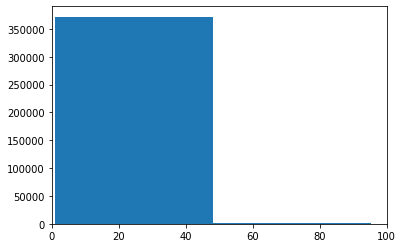

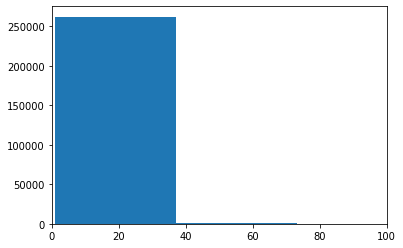

In [22]:
degree_distribution = []
for i in range(len(G)):
  dd = [G[i].degree(n) for n in G[i].nodes()]
  degree_distribution.append(dd)
  pyplot.hist(dd)
  pyplot.xlim(0,100)
  pyplot.show()

In [8]:
for i in range(len(degree_distribution)):
  Sum = sum(degree_distribution[i])
  for idx, degree in enumerate(degree_distribution[i]):
    degree_distribution[i][idx] = degree/Sum

In [24]:
from math import log2
from matplotlib import pyplot

heatmap = []

def kl_divergence(p, q):
	kl_divergence = 0
	for i in range(min(len(p),len(q))):
		kl_divergence += p[i] * log2(p[i]/q[i])
	return kl_divergence

for i in range(0, len(degree_distribution)):
	p = degree_distribution[i]
	row = []
	for j in range(0,len(degree_distribution)):
		q = degree_distribution[j]
		row.append(kl_divergence(p,q))
	heatmap.append(row)
	

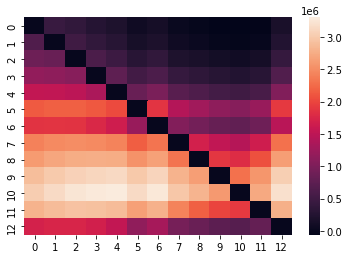

In [25]:
import seaborn as sn

hm = sn.heatmap(data = heatmap)
  
pyplot.show()